Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking
using CmdStan, StanMCMCChain
gr(size=(500,800))

Plots.GRBackend()

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = @__DIR__
cd(ProjDir)

### snippet 4.7

In [3]:
howell1 = CSV.read(joinpath(dirname(Base.pathof(StatisticalRethinking)), "..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);

Use only adults

In [4]:
df2 = filter(row -> row[:age] >= 18, df)
female_df = filter(row -> row[:male] == 0, df2)
male_df = filter(row -> row[:male] == 1, df2)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,156.845,53.0419,41.0,1
3,163.83,62.9926,35.0,1
4,168.91,55.48,27.0,1
5,165.1,54.4877,54.0,1
6,151.13,41.2202,66.0,1
7,163.195,48.5627,36.0,1
8,157.48,42.3258,44.0,1
9,161.29,48.9879,39.0,1


Plot the densities.

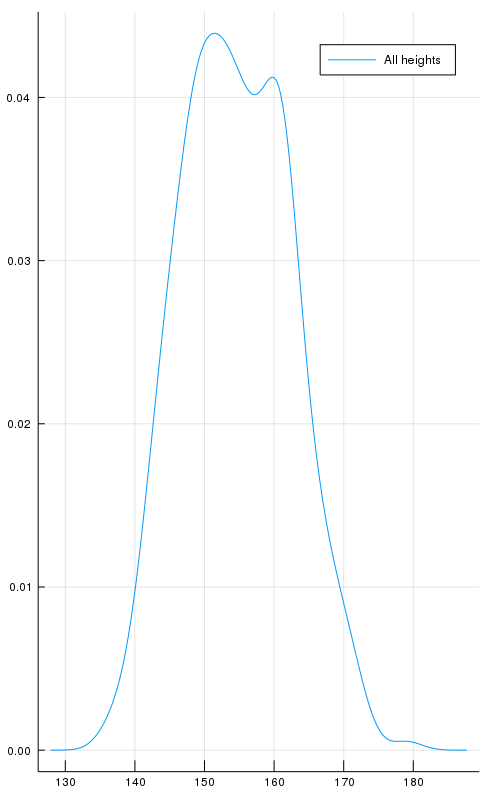

In [5]:
density(df2[:height], lab="All heights")

Is it bi-modal?

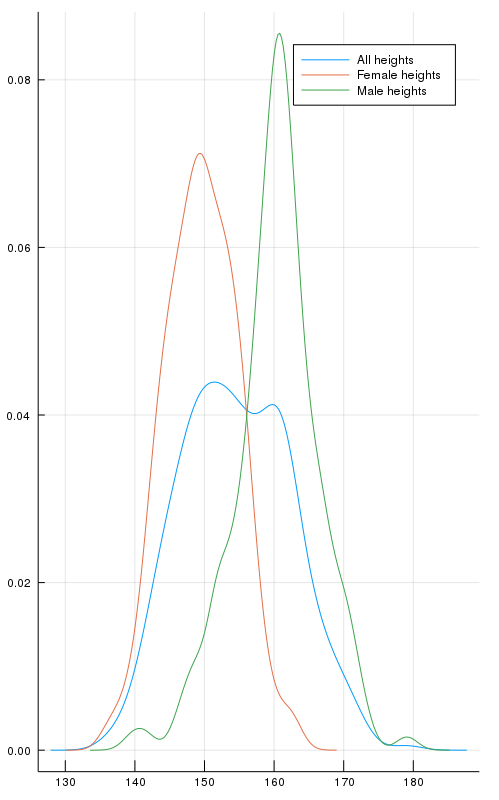

In [6]:
density!(female_df[:height], lab="Female heights")
density!(male_df[:height], lab="Male heights")

Define the Stan language model

In [7]:
heightsmodel = "
// Inferring a Rate
data {
  int N;
  real<lower=0> h[N];
}
parameters {
  real<lower=0> sigma;
  real<lower=0,upper=250> mu;
}
model {
  // Priors for mu and sigma
  mu ~ normal(178, 20);
  sigma ~ uniform( 0 , 50 );

  // Observed heights
  h ~ normal(mu, sigma);
}
"

"\n// Inferring a Rate\ndata {\n  int N;\n  real<lower=0> h[N];\n}\nparameters {\n  real<lower=0> sigma;\n  real<lower=0,upper=250> mu;\n}\nmodel {\n  // Priors for mu and sigma\n  mu ~ normal(178, 20);\n  sigma ~ uniform( 0 , 50 );\n\n  // Observed heights\n  h ~ normal(mu, sigma);\n}\n"

Define the Stanmodel and set the output format to :mcmcchain.

In [8]:
stanmodel = Stanmodel(name="heights", monitors = ["mu", "sigma"],model=heightsmodel,
  output_format=:mcmcchain)
# Input data for cmdstan
heightsdata = [
  Dict("N" => length(df2[:height]), "h" => df2[:height])
]

=====> /Users/rob/.julia/dev/StatisticalRethinking/notebooks/04


File /Users/rob/.julia/dev/StatisticalRethinking/notebooks/04/tmp/heights.stan will be updated.



1-element Array{Dict{String,Any},1}:
 Dict("N"=>352,"h"=>Union{Missing, Float64}[151.765, 139.7, 136.525, 156.845, 145.415, 163.83, 149.225, 168.91, 147.955, 165.1  …  156.21, 160.655, 146.05, 156.21, 152.4, 162.56, 142.875, 162.56, 156.21, 158.75])

Sample using cmdstan

In [9]:
rc, chn, cnames = stan(stanmodel, heightsdata, ProjDir, diagnostics=false,
  CmdStanDir=CMDSTAN_HOME)
# Describe the draws
describe(chn)



--- Translating Stan model to C++ code ---
bin/stanc  /Users/rob/.julia/dev/StatisticalRethinking/notebooks/04/tmp/heights.stan --o=/Users/rob/.julia/dev/StatisticalRethinking/notebooks/04/tmp/heights.hpp
Model name=heights_model
Input file=/Users/rob/.julia/dev/StatisticalRethinking/notebooks/04/tmp/heights.stan
Output file=/Users/rob/.julia/dev/StatisticalRethinking/notebooks/04/tmp/heights.hpp

--- Linking C++ model ---
clang++ -Wall -I . -isystem stan/lib/stan_math/lib/eigen_3.3.3 -isystem stan/lib/stan_math/lib/boost_1.66.0 -isystem stan/lib/stan_math/lib/sundials_3.1.0/include -std=c++1y -DBOOST_RESULT_OF_USE_TR1 -DBOOST_NO_DECLTYPE -DBOOST_DISABLE_ASSERTS -DBOOST_PHOENIX_NO_VARIADIC_EXPRESSION -Wno-unused-function -Wno-uninitialized -I src -isystem stan/src -isystem stan/lib/stan_math/ -DFUSION_MAX_VECTOR_SIZE=12 -Wno-unused-local-typedefs -DEIGEN_NO_DEBUG -DNO_FPRINTF_OUTPUT -pipe   src/cmdstan/main.cpp  -O3 -o /Users/rob/.julia/dev/StatisticalRethinking/notebooks/04/tmp/heig

Plot the density of posterior draws

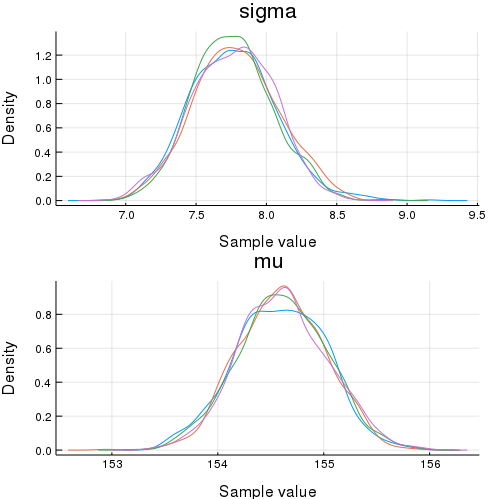

In [10]:
density(chn, lab="All heights")

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*